<a href="https://colab.research.google.com/github/Madhumita1110/PySpark_ELT_pipeline/blob/main/ELT_pipeline_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA OPERATIONS & MANAGEMENT - ELT PIPELINES


# Spark Setup

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar -xvf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

spark-3.1.2-bin-hadoop3.2/
spark-3.1.2-bin-hadoop3.2/R/
spark-3.1.2-bin-hadoop3.2/R/lib/
spark-3.1.2-bin-hadoop3.2/R/lib/sparkr.zip
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/worker.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/daemon.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/shell.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/general.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/index.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.1.2-

In [1]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [2]:
##import important packages

import findspark

findspark.init()

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark import SparkConf

ModuleNotFoundError: ignored

In [3]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)

NameError: ignored

In [ ]:
!pip install praw  ##install Python Reddit API Wrapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 8.3 MB/s eta 0:00:00


***Function for doing Time Analysis

In [ ]:
# define function for time analysis

import time

class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")

# Data Extraction and Loading (with single core)

In [ ]:
import praw

In [ ]:
t = Timer()
# Start the timer
t.start()

#####Interacting with Reddit API through Praw
reddit = praw.Reddit(client_id='Ye751ZrA8Dgy0thL6KIxvQ',
                     client_secret='gybSUJwtGhzuKep0FXU3MYpVZMtPdQ',
                     user_agent='MyProject')

# Configure the Spark application
conf = SparkConf().setAppName("Reddit Data").setMaster("local[1]") # assign 1 core

# Create a SparkSession
spark = SparkSession.builder.config(conf=conf).getOrCreate()
    
subreddits = ['Happy', 'Sad']  ##assign subreddits
data = []

##function to get top 3000 posts related to happy or sad state-of-mind
for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    top_posts = subreddit.top(limit=3000)
    for post in top_posts:
        data.append((post.id, post.title, post.score, post.num_crossposts, post.num_comments, 
                     post.created, post.permalink, post.subreddit_name_prefixed))

#### DATA LOADING ON A DATAFRAME
df = spark.createDataFrame(data, ['post_id','title', 'score', 'num_crossposts','num_comments','created', 'link',  'subreddit'])

#df.show(n=df.count(), truncate=False) ## uncomment to see all the records
df.show()

# Stop the timer
t.stop()


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

+-------+--------------------+-----+--------------+------------+-------------+--------------------+---------+
|post_id|               title|score|num_crossposts|num_comments|      created|                link|subreddit|
+-------+--------------------+-----+--------------+------------+-------------+--------------------+---------+
| 6yze1g|My sweet girl is ...|87156|             1|        1170|1.504925195E9|/r/happy/comments...|  r/happy|
| axac7r|7 years ago my ex...|84650|             4|        2030|1.551723455E9|/r/happy/comments...|  r/happy|
| afyn3l|200 days drugs fr...|66053|             1|        1686|1.547490145E9|/r/happy/comments...|  r/happy|
| 8xgij6|A year ago my wif...|61652|             2|        1225| 1.53117201E9|/r/happy/comments...|  r/happy|
| 9eyzip|Please help me sh...|57620|             3|         563|1.536682762E9|/r/happy/comments...|  r/happy|
| av1wf6|Got disowned over...|53475|             2|        2004|1.551201428E9|/r/happy/comments...|  r/happy|
| 96x9ve|C

In [ ]:
df.printSchema()

root
 |-- post_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- score: long (nullable = true)
 |-- num_crossposts: long (nullable = true)
 |-- num_comments: long (nullable = true)
 |-- created: double (nullable = true)
 |-- link: string (nullable = true)
 |-- subreddit: string (nullable = true)



# Data Cataloguing

Data cataloguing is the process of creating a metadata catalogue that provides a comprehensive inventory of the data assets in an organization. The primary goal of data cataloguing is to help users find and understand the data they need for analysis or other purposes.

In [ ]:
# Define metadata for the data
metadata = {'description': 'RedditPosts_ELTpipeline',
            'author': 'Madhumita',
            'created': '2023-05-11',
            'format': 'CSV',
            'columns': list(df.columns)
}

In [ ]:
#add metadata for the num_comments column

from pyspark.sql.functions import col

metadata['num_comments'] = {
    'data_type': 'int',
    'min_value': df.select(col('num_comments')).agg({'num_comments': 'min'}).collect()[0][0],
    'max_value': df.select(col('num_comments')).agg({'num_comments': 'max'}).collect()[0][0]
}


In [ ]:
metadata

{'description': 'RedditPosts_ELTpipeline',
 'author': 'Madhumita',
 'created': '2023-05-11',
 'format': 'CSV',
 'columns': ['post_id',
  'title',
  'score',
  'num_crossposts',
  'num_comments',
  'created',
  'link',
  'subreddit'],
 'num_comments': {'data_type': 'int', 'min_value': 0, 'max_value': 2030}}

# Data Wrangling

Data wrangling is the process of cleaning, transforming, and preparing raw data for analysis. It involves a series of steps that help to ensure that the data is in a format that can be easily analysed and understood.

In [ ]:
##fetch datetime and date from the social timestamp of the posts

from pyspark.sql.functions import from_unixtime, to_date


# Convert the social timestamp to a timestamp format
df = df.withColumn("datetime", from_unixtime("created"))

# Extract the date from the timestamp
df = df.withColumn("date", to_date("datetime"))

# Show the results
df.show()


+-------+--------------------+-----+--------------+------------+-------------+--------------------+---------+-------------------+----------+
|post_id|               title|score|num_crossposts|num_comments|      created|                link|subreddit|           datetime|      date|
+-------+--------------------+-----+--------------+------------+-------------+--------------------+---------+-------------------+----------+
| 6yze1g|My sweet girl is ...|87156|             1|        1170|1.504925195E9|/r/happy/comments...|  r/happy|2017-09-09 02:46:35|2017-09-09|
| axac7r|7 years ago my ex...|84650|             4|        2030|1.551723455E9|/r/happy/comments...|  r/happy|2019-03-04 18:17:35|2019-03-04|
| afyn3l|200 days drugs fr...|66053|             1|        1686|1.547490145E9|/r/happy/comments...|  r/happy|2019-01-14 18:22:25|2019-01-14|
| 8xgij6|A year ago my wif...|61652|             2|        1225| 1.53117201E9|/r/happy/comments...|  r/happy|2018-07-09 21:33:30|2018-07-09|
| 9eyzip|Plea

In [ ]:
df = df.drop("created","datetime") ##drop unwanted columns
df.show()

+-------+--------------------+-----+--------------+------------+--------------------+---------+----------+
|post_id|               title|score|num_crossposts|num_comments|                link|subreddit|      date|
+-------+--------------------+-----+--------------+------------+--------------------+---------+----------+
| 6yze1g|My sweet girl is ...|87156|             1|        1170|/r/happy/comments...|  r/happy|2017-09-09|
| axac7r|7 years ago my ex...|84650|             4|        2030|/r/happy/comments...|  r/happy|2019-03-04|
| afyn3l|200 days drugs fr...|66053|             1|        1686|/r/happy/comments...|  r/happy|2019-01-14|
| 8xgij6|A year ago my wif...|61652|             2|        1225|/r/happy/comments...|  r/happy|2018-07-09|
| 9eyzip|Please help me sh...|57620|             3|         563|/r/happy/comments...|  r/happy|2018-09-11|
| av1wf6|Got disowned over...|53475|             2|        2004|/r/happy/comments...|  r/happy|2019-02-26|
| 96x9ve|Currently in a to...|52408| 

# Data Transformation

The transformation stage is a critical part of the ELT process because it ensures that the data is accurate, consistent, and reliable. Some common transformations in the ELT process include data cleaning, data filtering, data joining, data aggregation, and data enrichment. 

In [ ]:
##data cleaning

from pyspark.sql.functions import substring

t = Timer()
t.start()
df = df.withColumn('label', substring(df.subreddit, 3, 10)) ###removing r/ before values in subreddit column
df = df.drop("subreddit")
df.show()
t.stop()

+-------+--------------------+-----+--------------+------------+--------------------+----------+-----+
|post_id|               title|score|num_crossposts|num_comments|                link|      date|label|
+-------+--------------------+-----+--------------+------------+--------------------+----------+-----+
| 6yze1g|My sweet girl is ...|87156|             1|        1170|/r/happy/comments...|2017-09-09|happy|
| axac7r|7 years ago my ex...|84650|             4|        2030|/r/happy/comments...|2019-03-04|happy|
| afyn3l|200 days drugs fr...|66053|             1|        1686|/r/happy/comments...|2019-01-14|happy|
| 8xgij6|A year ago my wif...|61652|             2|        1225|/r/happy/comments...|2018-07-09|happy|
| 9eyzip|Please help me sh...|57620|             3|         563|/r/happy/comments...|2018-09-11|happy|
| av1wf6|Got disowned over...|53475|             2|        2004|/r/happy/comments...|2019-02-26|happy|
| 96x9ve|Currently in a to...|52408|            10|         876|/r/happy/

In [ ]:
#total count of posts from each label

t = Timer()
t.start()
df.groupBy('label').count().show(5)
t.stop()


+-----+-----+
|label|count|
+-----+-----+
|  sad| 1000|
|happy|  979|
+-----+-----+

Elapsed time: 1.7236 seconds


In [ ]:
#top posts with highest scores
t = Timer()

t.start()
df.select('post_id', 'score', 'label').orderBy('score' , ascending=False).show(5, truncate=False) 
t.stop()

+-------+-----+-----+
|post_id|score|label|
+-------+-----+-----+
|6yze1g |87156|happy|
|axac7r |84650|happy|
|afyn3l |66053|happy|
|8xgij6 |61652|happy|
|9eyzip |57620|happy|
+-------+-----+-----+
only showing top 5 rows

Elapsed time: 0.3871 seconds


In [ ]:
#most popular posts based on number of comments

t = Timer()

t.start()
df.select('post_id', 'title','num_comments', 'label').orderBy('score' , ascending=False).show(5, truncate=False) 
t.stop()

+-------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+-----+
|post_id|title                                                                                                                                                                                                                                                                                                   |num_comments|label|
+-------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+-----+
|6yze1g |My sweet girl

In [ ]:
#filtering rows based on num of comments greater than 100

t = Timer()
t.start()
df.where(df.num_comments>100).show()
t.stop()


+-------+--------------------+-----+--------------+------------+--------------------+----------+-----+
|post_id|               title|score|num_crossposts|num_comments|                link|      date|label|
+-------+--------------------+-----+--------------+------------+--------------------+----------+-----+
| 6yze1g|My sweet girl is ...|87156|             1|        1170|/r/happy/comments...|2017-09-09|happy|
| axac7r|7 years ago my ex...|84650|             4|        2030|/r/happy/comments...|2019-03-04|happy|
| afyn3l|200 days drugs fr...|66053|             1|        1686|/r/happy/comments...|2019-01-14|happy|
| 8xgij6|A year ago my wif...|61652|             2|        1225|/r/happy/comments...|2018-07-09|happy|
| 9eyzip|Please help me sh...|57620|             3|         563|/r/happy/comments...|2018-09-11|happy|
| av1wf6|Got disowned over...|53475|             2|        2004|/r/happy/comments...|2019-02-26|happy|
| 96x9ve|Currently in a to...|52408|            10|         876|/r/happy/

In [ ]:
###drop unwanted columns

df= df.drop('post_id')
df.show()

+--------------------+-----+--------------+------------+--------------------+----------+-----+
|               title|score|num_crossposts|num_comments|                link|      date|label|
+--------------------+-----+--------------+------------+--------------------+----------+-----+
|My sweet girl is ...|87156|             1|        1170|/r/happy/comments...|2017-09-09|happy|
|7 years ago my ex...|84650|             4|        2030|/r/happy/comments...|2019-03-04|happy|
|200 days drugs fr...|66053|             1|        1686|/r/happy/comments...|2019-01-14|happy|
|A year ago my wif...|61652|             2|        1225|/r/happy/comments...|2018-07-09|happy|
|Please help me sh...|57620|             3|         563|/r/happy/comments...|2018-09-11|happy|
|Got disowned over...|53475|             2|        2004|/r/happy/comments...|2019-02-26|happy|
|Currently in a to...|52408|            10|         876|/r/happy/comments...|2018-08-13|happy|
|13 years ago, I s...|51831|             0|       

In [ ]:
##data sorting

sorted_df = df.sort("date") # ascending order
sorted_df.show()


+--------------------+-----+--------------+------------+--------------------+----------+-----+
|               title|score|num_crossposts|num_comments|                link|      date|label|
+--------------------+-----+--------------+------------+--------------------+----------+-----+
|Couldn't find a m...|  204|             0|           1|/r/sad/comments/1...|2012-10-14|  sad|
|I found this at r...|  276|             0|          12|/r/sad/comments/1...|2012-11-05|  sad|
|Reminds me I'm gr...|  259|             0|           6|/r/sad/comments/1...|2012-12-27|  sad|
|       Trying to fly|  306|             0|           9|/r/sad/comments/1...|2013-01-08|  sad|
|What your cat is ...|  193|             0|           7|/r/sad/comments/1...|2013-02-07|  sad|
|This was the last...|  262|             0|          16|/r/sad/comments/1...|2013-03-07|  sad|
|                2 am|  407|             1|          12|/r/sad/comments/1...|2013-04-02|  sad|
|            Powerful|  258|             0|       

# Data Visualisation

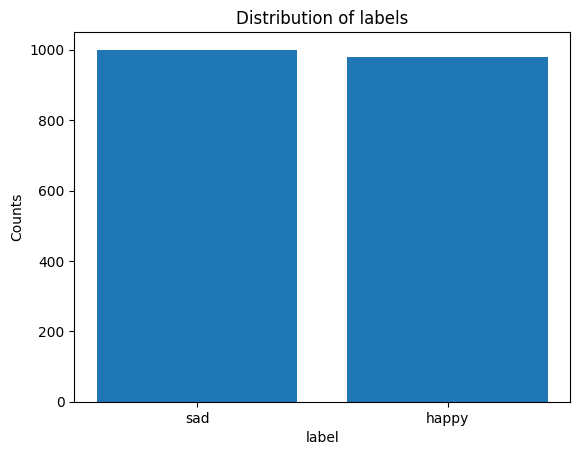

In [ ]:
##Distribution of label 'happy' or 'sad' in our dataset.

import matplotlib.pyplot as plt

dist = df.groupBy("label").count()

subreddits = [row[0] for row in dist.collect()]
counts = [row[1] for row in dist.collect()]

plt.bar(subreddits, counts)
plt.title("Distribution of labels")
plt.xlabel("label")
plt.ylabel("Counts")
plt.show()

Now, we will try to make a wordcloud out of the text from the 'title' column. Wordcloud refers to the frequency of the words which occured most times in the text.

In [ ]:
###REMOVE  STOPWORDS

from pyspark.sql.functions import split, explode, col
from pyspark.ml.feature import StopWordsRemover

# Split the "title" column into an array of words
df = df.withColumn("words", split(df["title"], " "))

# Apply stopwords removal to the "words" column
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
filtered_df = remover.transform(df).select('filtered_words')

# Show the resulting column
filtered_df.show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|filtered_words                                                                                                                                                                                                                                         |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[sweet, girl, CANCER, FREE, today!!!]                                                                                                                                                                                                                  |


In [ ]:
#To process the individual strings within each list, explode the column of lists into individual rows

exploded_df = filtered_df.select(explode("filtered_words"))

# Convert the filtered words to a string

words_string = " ".join(exploded_df.rdd.flatMap(lambda x: x).collect())
words_string

'sweet girl CANCER FREE today!!! 7 years ago ex slammed face bathroom counter damaged front teeth. Last week dentist fixed free charge. first time 7 years actually smile. 200 days drugs free today, way first day college. year ago wife left girls. finally got finalized divorce papers mail today! means officially custody two tiny monsters! I’ve also lost 70lbs last year, working get healthy watch two grow up. Haven’t happy forever. Please help shock husband picture showing reddit popular feed. 😂 spend evenings scrolling reddit feeds together giggling & sharing posts one another. Got disowned holidays, I’m back car, phone, place live - self bought. It’s gonna get better here. Currently tough position money-wise hungry birthday week u/PM__ME___UR__BOOTY sent three pizzas, two bottles soda, two cupcakes, want world know he’s amazing 13 years ago, started medical school. walked today heart lung surgeon. Today, happy. mugshot two years ago following massive PCP/benzo overdose homelessness tri

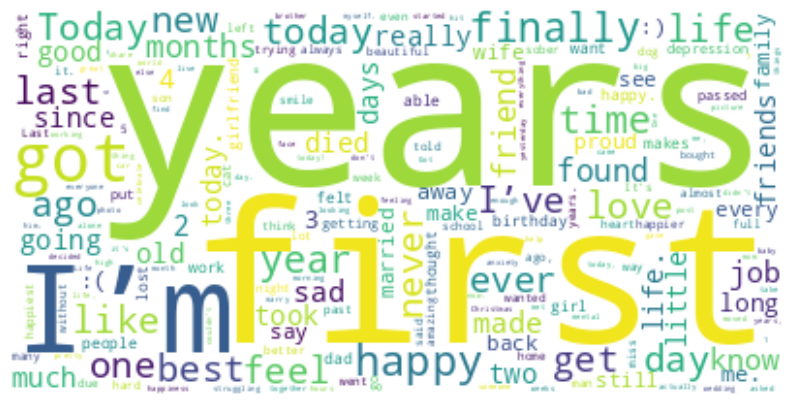

In [ ]:
from wordcloud import WordCloud
from collections import Counter

# Count frequency of each word
word_freq = Counter(words_string.split())
# Create word cloud
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(word_freq)

fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(12) # set height
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Scalability: Parallel cores

Now, we do the same tasks with multiple cores in parallel and see how it reduces computational time by assigning work to multiple machines which run on parallel.

In [ ]:
# Start the timer
t = Timer()
t.start()

# Configure the Spark application
conf = SparkConf().setAppName("Reddit Data").setMaster("local[2]") # assign 2 cores

# Create a SparkSession
spark = SparkSession.builder.config(conf=conf).getOrCreate()

##Interacting with Reddit API through Praw (The Reddit class provides convenient access to Reddit's API)
reddit = praw.Reddit(client_id='Ye751ZrA8Dgy0thL6KIxvQ',
                     client_secret='gybSUJwtGhzuKep0FXU3MYpVZMtPdQ',
                     user_agent='MyProject')

subreddits = ['Happy', 'Sad']  ##assign the subreddits


sc = spark.sparkContext #Initialize a SparkContext object in PySpark, which is the entry point for Spark functionality

##function to get top 3000 posts related to happy or sad state-of-mind
def get_subreddit_data(subreddit_name):
    subreddit = reddit.subreddit(subreddit_name)
    top_posts = subreddit.top(limit=3000)
    data = []
    for post in top_posts:
        data.append((post.id, post.title, post.score, post.num_crossposts, post.num_comments, post.created, post.permalink, 
                       post.subreddit_name_prefixed))
    return data

##parallelise work between 2 cores
data_rdd = sc.parallelize(subreddits).flatMap(get_subreddit_data)

##store data in dataframe
df = spark.createDataFrame(data_rdd, ['post_id','title', 'score', 'num_crossposts','num_comments','created', 'link',  'subreddit'])
df.show()

# Stop the timer
t.stop()


+-------+--------------------+-----+--------------+------------+-------------+--------------------+---------+
|post_id|               title|score|num_crossposts|num_comments|      created|                link|subreddit|
+-------+--------------------+-----+--------------+------------+-------------+--------------------+---------+
| 6yze1g|My sweet girl is ...|87161|             1|        1170|1.504925195E9|/r/happy/comments...|  r/happy|
| axac7r|7 years ago my ex...|84655|             4|        2030|1.551723455E9|/r/happy/comments...|  r/happy|
| afyn3l|200 days drugs fr...|66046|             1|        1686|1.547490145E9|/r/happy/comments...|  r/happy|
| 8xgij6|A year ago my wif...|61659|             2|        1225| 1.53117201E9|/r/happy/comments...|  r/happy|
| 9eyzip|Please help me sh...|57615|             3|         563|1.536682762E9|/r/happy/comments...|  r/happy|
| av1wf6|Got disowned over...|53477|             2|        2004|1.551201428E9|/r/happy/comments...|  r/happy|
| 96x9ve|C

In [ ]:
#top posts with highest scores (time taken now with 2 cores)
t = Timer()

t.start()
df.select('post_id', 'score', 'subreddit').orderBy('score' , ascending=False).show(5, truncate=False) 
t.stop()

+-------+-----+---------+
|post_id|score|subreddit|
+-------+-----+---------+
|6yze1g |87152|r/happy  |
|axac7r |84655|r/happy  |
|afyn3l |66042|r/happy  |
|8xgij6 |61652|r/happy  |
|9eyzip |57607|r/happy  |
+-------+-----+---------+
only showing top 5 rows

Elapsed time: 114.6820 seconds


In [ ]:
#filtering rows based on num of comments greater than 100 (time taken now with 2 cores)

t = Timer()
t.start()
df.where(df.num_comments>100).show()
t.stop()

+-------+--------------------+-----+--------------+------------+-------------+--------------------+---------+
|post_id|               title|score|num_crossposts|num_comments|      created|                link|subreddit|
+-------+--------------------+-----+--------------+------------+-------------+--------------------+---------+
| 8zcjh1|Despite the anxie...| 8058|             1|         294|1.531759918E9|/r/Anxiety/commen...|r/Anxiety|
| b18zmk|Today I promised ...| 6159|             1|         242|1.552614917E9|/r/Anxiety/commen...|r/Anxiety|
| asl2gr|Professor here, i...| 5335|             2|         208|1.550644753E9|/r/Anxiety/commen...|r/Anxiety|
| av1397|Have my first rea...| 5210|             0|         141|1.551197315E9|/r/Anxiety/commen...|r/Anxiety|
| n0y195|My Uber driver ha...| 5018|             1|         151|   1.619676E9|/r/Anxiety/commen...|r/Anxiety|
| fgqyxb|How to order from...| 4747|             0|         122|1.583898306E9|/r/Anxiety/commen...|r/Anxiety|
| d56opw|1

In [ ]:
##drop column 'created' 

t = Timer()
t.start()
df1=df.drop("created")
t.stop()
df1.show()

Elapsed time: 0.0072 seconds
+-------+--------------------+-----+--------------+------------+--------------------+---------+
|post_id|               title|score|num_crossposts|num_comments|                link|subreddit|
+-------+--------------------+-----+--------------+------------+--------------------+---------+
| j91af5|Saw this - hope i...|  239|             1|           0|/r/Stress/comment...| r/Stress|
| fk21j6|To everyone with ...|  181|             0|          10|/r/Stress/comment...| r/Stress|
| f1pbiw|it will be okay i...|  147|             0|           5|/r/Stress/comment...| r/Stress|
| pc5ymh|9 ways to lower c...|  125|             0|           4|/r/Stress/comment...| r/Stress|
| hkt00s|Does anybody else...|  115|             0|          21|/r/Stress/comment...| r/Stress|
| 88thq0|Everything is goi...|   89|             1|           6|/r/Stress/comment...| r/Stress|
| lytk08|Does anyone else ...|   76|             0|          34|/r/Stress/comment...| r/Stress|
| admup2|If

In [ ]:
# Start the timer
t = Timer()
t.start()

# Configure the Spark application
conf = SparkConf().setAppName("Reddit Data").setMaster("local[4]") # assign 4 cores

# Create a SparkSession
spark = SparkSession.builder.config(conf=conf).getOrCreate()

reddit = praw.Reddit(client_id='Ye751ZrA8Dgy0thL6KIxvQ',
                     client_secret='gybSUJwtGhzuKep0FXU3MYpVZMtPdQ',
                     user_agent='MyProject')

subreddits = ['Happy', 'Sad']  


sc = spark.sparkContext

def get_subreddit_data(subreddit_name):
    subreddit = reddit.subreddit(subreddit_name)
    top_posts = subreddit.top(limit=3000)
    data = []
    for post in top_posts:
        data.append((post.id, post.title, post.score, post.num_crossposts, post.num_comments, post.created, post.permalink, 
                       post.subreddit_name_prefixed))
    return data

data_rdd = sc.parallelize(subreddits).flatMap(get_subreddit_data)
df = spark.createDataFrame(data_rdd, ['post_id','title', 'score', 'num_crossposts','num_comments','created', 'link',  'subreddit'])
df.show()

# Stop the timer
t.stop()

+-------+--------------------+-----+--------------+------------+-------------+--------------------+---------+
|post_id|               title|score|num_crossposts|num_comments|      created|                link|subreddit|
+-------+--------------------+-----+--------------+------------+-------------+--------------------+---------+
| 6yze1g|My sweet girl is ...|87158|             1|        1170|1.504925195E9|/r/happy/comments...|  r/happy|
| axac7r|7 years ago my ex...|84657|             4|        2030|1.551723455E9|/r/happy/comments...|  r/happy|
| afyn3l|200 days drugs fr...|66055|             1|        1686|1.547490145E9|/r/happy/comments...|  r/happy|
| 8xgij6|A year ago my wif...|61656|             2|        1225| 1.53117201E9|/r/happy/comments...|  r/happy|
| 9eyzip|Please help me sh...|57610|             3|         563|1.536682762E9|/r/happy/comments...|  r/happy|
| av1wf6|Got disowned over...|53478|             2|        2004|1.551201428E9|/r/happy/comments...|  r/happy|
| 96x9ve|C

So, we see that scalability helped us improving our computational time by assigning multiple cores in parallel. When we work with big data, it is very difficult to process all the data on a single machine, so scalability plays an important role in handling huge workloads without compromising performance. 